In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = "../../data/Cleaned_Data/train_cleaned.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,employee_id,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work-life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
len(df)

59598

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               59598 non-null  int64 
 1   age                       59598 non-null  int64 
 2   gender                    59598 non-null  object
 3   years_at_company          59598 non-null  int64 
 4   job_role                  59598 non-null  object
 5   monthly_income            59598 non-null  int64 
 6   work-life_balance         59598 non-null  object
 7   job_satisfaction          59598 non-null  object
 8   performance_rating        59598 non-null  object
 9   number_of_promotions      59598 non-null  int64 
 10  overtime                  59598 non-null  object
 11  distance_from_home        59598 non-null  int64 
 12  education_level           59598 non-null  object
 13  marital_status            59598 non-null  object
 14  number_of_dependents  

In [8]:
df.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,company_tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


### Years at Company

In [9]:
df["years_at_company"].unique()

array([19,  4, 10,  7, 41,  3, 23, 16, 44,  1, 12,  6, 38, 22, 30,  9, 37,
       33, 13,  5, 21, 32, 34, 11,  2, 18, 27, 17, 36,  8, 28, 35, 14, 24,
       40, 15, 45, 39, 20, 43, 26, 29, 46, 42, 25, 31, 47, 48, 49, 50, 51])

In [10]:
#The mode of the years at the company
df["years_at_company"].mode()

0    5
Name: years_at_company, dtype: int64

In [11]:
df["years_at_company"].value_counts()

years_at_company
5     2456
2     2453
1     2421
8     2403
9     2400
10    2380
3     2366
6     2344
7     2336
11    2326
4     2302
12    2206
13    2048
14    1910
15    1837
16    1726
17    1570
18    1483
19    1403
20    1365
21    1272
23    1223
22    1215
24    1101
25    1023
26     998
27     984
28     889
29     854
30     793
31     761
32     706
33     657
34     648
36     519
35     508
37     464
38     454
39     446
40     381
41     345
42     294
43     266
45     239
44     216
46     189
47     145
48     111
49      87
50      49
51      26
Name: count, dtype: int64

In [12]:
df.groupby(["attrition"])['years_at_company'].mean()

attrition
Left      14.987226
Stayed    16.448912
Name: years_at_company, dtype: float64

In [13]:
df.loc[df["attrition"] == "Left", "years_at_company"].mode()

0    5
Name: years_at_company, dtype: int64

In [14]:
df.loc[df["attrition"] == "Stayed", "years_at_company"].mode()

0    10
Name: years_at_company, dtype: int64

In [15]:
len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] > 5)])

21955

In [16]:
len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] < 5)])

5051

In [17]:
len(df.loc[(df["attrition"] == "Stayed") & (df["years_at_company"] > 5)])

25645

In [18]:
len(df.loc[(df["attrition"] == "Stayed") & (df["years_at_company"] < 5)])

4491

In [19]:
len(df[df["years_at_company"] > 5])

47600

In [20]:
len(df[df["years_at_company"] < 5])

9542

### Monthly Income

In [21]:
df["monthly_income"].describe()

count    59598.000000
mean      7302.397983
std       2151.457423
min       1316.000000
25%       5658.000000
50%       7354.000000
75%       8880.000000
max      16149.000000
Name: monthly_income, dtype: float64

In [22]:
df.groupby(["attrition"])["monthly_income"].mean()

attrition
Left      7276.689533
Stayed    7325.703359
Name: monthly_income, dtype: float64

In [23]:
income_mean = float(df["monthly_income"].describe()["mean"])
income_mean
income_min = float(df["monthly_income"].describe()["min"])


In [24]:
left_income_mean = float(df.groupby(["attrition"])["monthly_income"].mean()["Left"])
left_income_mean

7276.689533488602

In [25]:
df.groupby(["attrition"])["monthly_income"].median()

attrition
Left      7321.5
Stayed    7380.0
Name: monthly_income, dtype: float64

In [26]:
print(df.loc[(df["attrition"] == "Left"), "monthly_income"].min())
print(df.loc[(df["attrition"] == "Left"), "monthly_income"].max())

1316
16149


In [27]:
print(df.loc[(df["attrition"] == "Stayed"), "monthly_income"].min())
print(df.loc[(df["attrition"] == "Stayed"), "monthly_income"].max())

1575
15464


In [28]:
print(len(df.loc[(df["attrition"] == "Left") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Left") & (df["monthly_income"] > income_mean)]))

14097
14241


In [29]:
print(len(df.loc[(df["attrition"] == "Stayed") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Stayed") & (df["monthly_income"] > income_mean)]))

15308
15952


### Job Role

In [30]:
df["job_role"].unique()

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

In [31]:
df["job_role"].value_counts()

job_role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64

In [32]:
df.groupby(["attrition"])["job_role"].value_counts()

attrition  job_role  
Left       Technology    7333
           Healthcare    6454
           Education     6085
           Media         4542
           Finance       3924
Stayed     Technology    8174
           Healthcare    7188
           Education     6405
           Media         5032
           Finance       4461
Name: count, dtype: int64

### Work-life Balance

In [33]:
df.groupby(["work-life_balance"])["attrition"].value_counts()

work-life_balance  attrition
Excellent          Stayed        6880
                   Left          3839
Fair               Left         10370
                   Stayed        7676
Good               Stayed       13391
                   Left          9137
Poor               Left          4992
                   Stayed        3313
Name: count, dtype: int64

In [34]:
print(len(df.loc[(df["attrition"] == "Left") & (df["work-life_balance"] == "Poor") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Left") & (df["work-life_balance"] == "Poor") & (df["monthly_income"] > income_mean)]))

2499
2493


In [35]:
df.groupby(["job_role"])["work-life_balance"].value_counts()

job_role    work-life_balance
Education   Good                 4730
            Fair                 3741
            Excellent            2240
            Poor                 1779
Finance     Good                 3238
            Fair                 2469
            Excellent            1522
            Poor                 1156
Healthcare  Good                 5145
            Fair                 4134
            Excellent            2481
            Poor                 1882
Media       Good                 3591
            Fair                 2960
            Excellent            1685
            Poor                 1338
Technology  Good                 5824
            Fair                 4742
            Excellent            2791
            Poor                 2150
Name: count, dtype: int64

In [36]:
df.groupby(["attrition", "job_role"])["work-life_balance"].value_counts()

attrition  job_role    work-life_balance
Left       Education   Fair                 2186
                       Good                 1958
                       Poor                 1082
                       Excellent             859
           Finance     Fair                 1387
                       Good                 1300
                       Poor                  705
                       Excellent             532
           Healthcare  Fair                 2378
                       Good                 2025
                       Poor                 1154
                       Excellent             897
           Media       Fair                 1690
                       Good                 1480
                       Poor                  791
                       Excellent             581
           Technology  Fair                 2729
                       Good                 2374
                       Poor                 1260
                       Excel

### Job Satisfaction

In [37]:
df.job_satisfaction.unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [38]:
df.job_satisfaction.value_counts()

job_satisfaction
High         29779
Very High    12111
Medium       11817
Low           5891
Name: count, dtype: int64

In [39]:
df.groupby(["job_satisfaction","gender"])["employee_id"].count()

job_satisfaction  gender
High              Female    13420
                  Male      16359
Low               Female     2657
                  Male       3234
Medium            Female     5393
                  Male       6424
Very High         Female     5389
                  Male       6722
Name: employee_id, dtype: int64

In [40]:
df.groupby(["job_satisfaction","attrition"])["employee_id"].count()

job_satisfaction  attrition
High              Left         13489
                  Stayed       16290
Low               Left          3088
                  Stayed        2803
Medium            Left          5356
                  Stayed        6461
Very High         Left          6405
                  Stayed        5706
Name: employee_id, dtype: int64

### Performance Rating

In [41]:
df.columns

Index(['employee_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work-life_balance', 'job_satisfaction',
       'performance_rating', 'number_of_promotions', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'number_of_dependents', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition', 'attrition'],
      dtype='object')

In [42]:
print(df.performance_rating.value_counts())
df.groupby(["performance_rating"])["number_of_promotions"].sum()

performance_rating
Average          35810
High             11888
Below Average     8950
Low               2950
Name: count, dtype: int64


performance_rating
Average          29845
Below Average     7351
High              9988
Low               2436
Name: number_of_promotions, dtype: int64

In [43]:
len(df)

59598

In [44]:
df.loc[(df["number_of_promotions"] > 0), "performance_rating"].value_counts()

performance_rating
Average          18019
High              5978
Below Average     4413
Low               1472
Name: count, dtype: int64

In [45]:
df.loc[(df["number_of_promotions"] == 0), "performance_rating"].value_counts()

performance_rating
Average          17791
High              5910
Below Average     4537
Low               1478
Name: count, dtype: int64

### Overtime

In [46]:
print(df.job_role.value_counts())
df.groupby(["overtime", "job_role"])["employee_id"].count()['Yes']

job_role
Technology    15507
Healthcare    13642
Education     12490
Media          9574
Finance        8385
Name: count, dtype: int64


job_role
Education     4040
Finance       2724
Healthcare    4408
Media         3199
Technology    5079
Name: employee_id, dtype: int64

### Job level

In [47]:
df.groupby([ "attrition","job_level", "performance_rating"])["employee_id"].count()

attrition  job_level  performance_rating
Left       Entry      Average               8876
                      Below Average         2406
                      High                  2958
                      Low                    842
           Mid        Average               6293
                      Below Average         1805
                      High                  2047
                      Low                    678
           Senior     Average               1358
                      Below Average          426
                      High                   472
                      Low                    177
Stayed     Entry      Average               5422
                      Below Average         1155
                      High                  1887
                      Low                    321
           Mid        Average               8018
                      Below Average         1815
                      High                  2561
                      Low   

In [48]:
display(df.groupby([ "job_level","attrition"])["employee_id"].count())

job_level  attrition
Entry      Left         15082
           Stayed        8785
Mid        Left         10823
           Stayed       12930
Senior     Left          2433
           Stayed        9545
Name: employee_id, dtype: int64

In [49]:
df.columns

Index(['employee_id', 'age', 'gender', 'years_at_company', 'job_role',
       'monthly_income', 'work-life_balance', 'job_satisfaction',
       'performance_rating', 'number_of_promotions', 'overtime',
       'distance_from_home', 'education_level', 'marital_status',
       'number_of_dependents', 'job_level', 'company_size', 'company_tenure',
       'remote_work', 'leadership_opportunities', 'innovation_opportunities',
       'company_reputation', 'employee_recognition', 'attrition'],
      dtype='object')

In [50]:
display(df.groupby([ "job_level"])["years_at_company"].max())

job_level
Entry     51
Mid       51
Senior    51
Name: years_at_company, dtype: int64

In [51]:
df.loc[(df["years_at_company"] <= df["age"] -18)] #This data that we will be working on if the iqr did not make any sense

,employee_id,age,gender,years_at_company,job_role,monthly_income,work-life_balance,job_satisfaction,performance_rating,number_of_promotions,...,number_of_dependents,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59585,59736,56,Male,16,Technology,11048,Good,Low,Average,1,...,2,Entry,Medium,25,No,No,No,Good,Medium,Left
59588,67222,49,Male,28,Technology,6533,Fair,Medium,High,1,...,4,Entry,Medium,93,No,No,No,Good,Medium,Left
59591,60264,42,Male,10,Technology,10727,Good,High,Average,0,...,1,Mid,Small,73,No,No,No,Fair,High,Left
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left


### Distance from Home

In [52]:
df.distance_from_home.describe()

count    59598.000000
mean        50.007651
std         28.466459
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: distance_from_home, dtype: float64

In [53]:
df.groupby(["job_role"])["distance_from_home"].describe()

,count,mean,std,min,25%,50%,75%,max
job_role,,,,,,,,
Education,12490.0,49.959888,28.393539,1.0,25.0,50.0,75.0,99.0
Finance,8385.0,50.281694,28.480078,1.0,26.0,51.0,74.0,99.0
Healthcare,13642.0,50.082099,28.537013,1.0,25.0,50.0,75.0,99.0
Media,9574.0,50.043033,28.578923,1.0,25.0,50.0,75.0,99.0
Technology,15507.0,49.810602,28.388073,1.0,25.0,50.0,74.0,99.0


In [54]:
df.groupby(["attrition"])["distance_from_home"].describe()

,count,mean,std,min,25%,50%,75%,max
attrition,,,,,,,,
Left,28338.0,52.864987,28.306901,1.0,29.0,55.0,77.0,99.0
Stayed,31260.0,47.417402,28.363110,1.0,23.0,45.0,72.0,99.0


In [55]:
df.groupby(["performance_rating"])["distance_from_home"].describe()

,count,mean,std,min,25%,50%,75%,max
performance_rating,,,,,,,,
Average,35810.0,49.850880,28.460365,1.0,25.0,50.0,74.0,99.0
Below Average,8950.0,50.503352,28.407274,1.0,26.0,51.0,75.0,99.0
High,11888.0,50.118691,28.478263,1.0,25.0,50.0,75.0,99.0
Low,2950.0,49.959322,28.666788,1.0,24.0,49.0,75.0,99.0


### Education Level

### Marital Status

In [56]:
df.groupby(["marital_status", "remote_work"])["employee_id"].count()

marital_status  remote_work
Divorced        No              7161
                Yes             1694
Married         No             24202
                Yes             5706
Single          No             16876
                Yes             3959
Name: employee_id, dtype: int64

In [57]:
df.groupby(["marital_status", "gender", "remote_work"])["employee_id"].count()

marital_status  gender  remote_work
Divorced        Female  No              3244
                        Yes              780
                Male    No              3917
                        Yes              914
Married         Female  No             10872
                        Yes             2603
                Male    No             13330
                        Yes             3103
Single          Female  No              7635
                        Yes             1725
                Male    No              9241
                        Yes             2234
Name: employee_id, dtype: int64

In [58]:
df["remote_work"].value_counts()

remote_work
No     48239
Yes    11359
Name: count, dtype: int64

In [59]:
df.groupby(["marital_status", "attrition"])["employee_id"].count()

marital_status  attrition
Divorced        Left          3604
                Stayed        5251
Married         Left         10811
                Stayed       19097
Single          Left         13923
                Stayed        6912
Name: employee_id, dtype: int64

In [60]:
if "company_tenure" in df.columns:
    df.drop(columns="company_tenure", inplace=True)

In [61]:
df.groupby(["attrition", "leadership_opportunities"])["employee_id"].count()

attrition  leadership_opportunities
Left       No                          27016
           Yes                          1322
Stayed     No                          29664
           Yes                          1596
Name: employee_id, dtype: int64

In [62]:
df["leadership_opportunities"].value_counts()

leadership_opportunities
No     56680
Yes     2918
Name: count, dtype: int64

In [63]:
df.groupby(["attrition", "company_size"])["employee_id"].count()

attrition  company_size
Left       Large            5538
           Medium          13855
           Small            8945
Stayed     Large            6380
           Medium          15890
           Small            8990
Name: employee_id, dtype: int64

In [64]:
df["company_size"].value_counts()

company_size
Medium    29745
Small     17935
Large     11918
Name: count, dtype: int64

In [65]:
df.groupby(["company_size"])["years_at_company"].mean()

company_size
Large     15.839654
Medium    15.699950
Small     15.786395
Name: years_at_company, dtype: float64

In [66]:
df.groupby(["company_size", "overtime"])["employee_id"].count()

company_size  overtime
Large         No           8069
              Yes          3849
Medium        No          19930
              Yes          9815
Small         No          12149
              Yes          5786
Name: employee_id, dtype: int64

In [67]:
df.groupby(["attrition", "innovation_opportunities"])["employee_id"].count()

attrition  innovation_opportunities
Left       No                          23961
           Yes                          4377
Stayed     No                          25934
           Yes                          5326
Name: employee_id, dtype: int64

In [68]:
df["age_groups"] = df["age"].apply(lambda x: "18-25" if x <= 25 else ("26-35" if x <= 35 else ("36-45" if x <= 45 else ("46-55" if x <= 55 else "55+")))) 
df["age_groups"].value_counts()

age_groups
36-45    14398
46-55    14217
26-35    14122
18-25    11203
55+       5658
Name: count, dtype: int64

In [69]:
df["age_before_working"] = df["age"] - df["years_at_company"]
df["age_before_working"].unique()

array([12, 55, 14, 29, 15, 35, 24, 32, 13, 23, 18,  9, 10, 36, 20, 38, 49,
       39, 16, 11, 41, 17, 31, 28, 34, 40, 22, 30, 25,  8, 21, 47, 51, 44,
       19, 27, 37, 52, 42, 46, 33, 50, 26, 56, 54, 53, 43, 45, 48, 57, 58])

## Visualisation

C:\Users\Lenovo - LOQ\AppData\Local\Temp\ipykernel_5448\3000317583.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



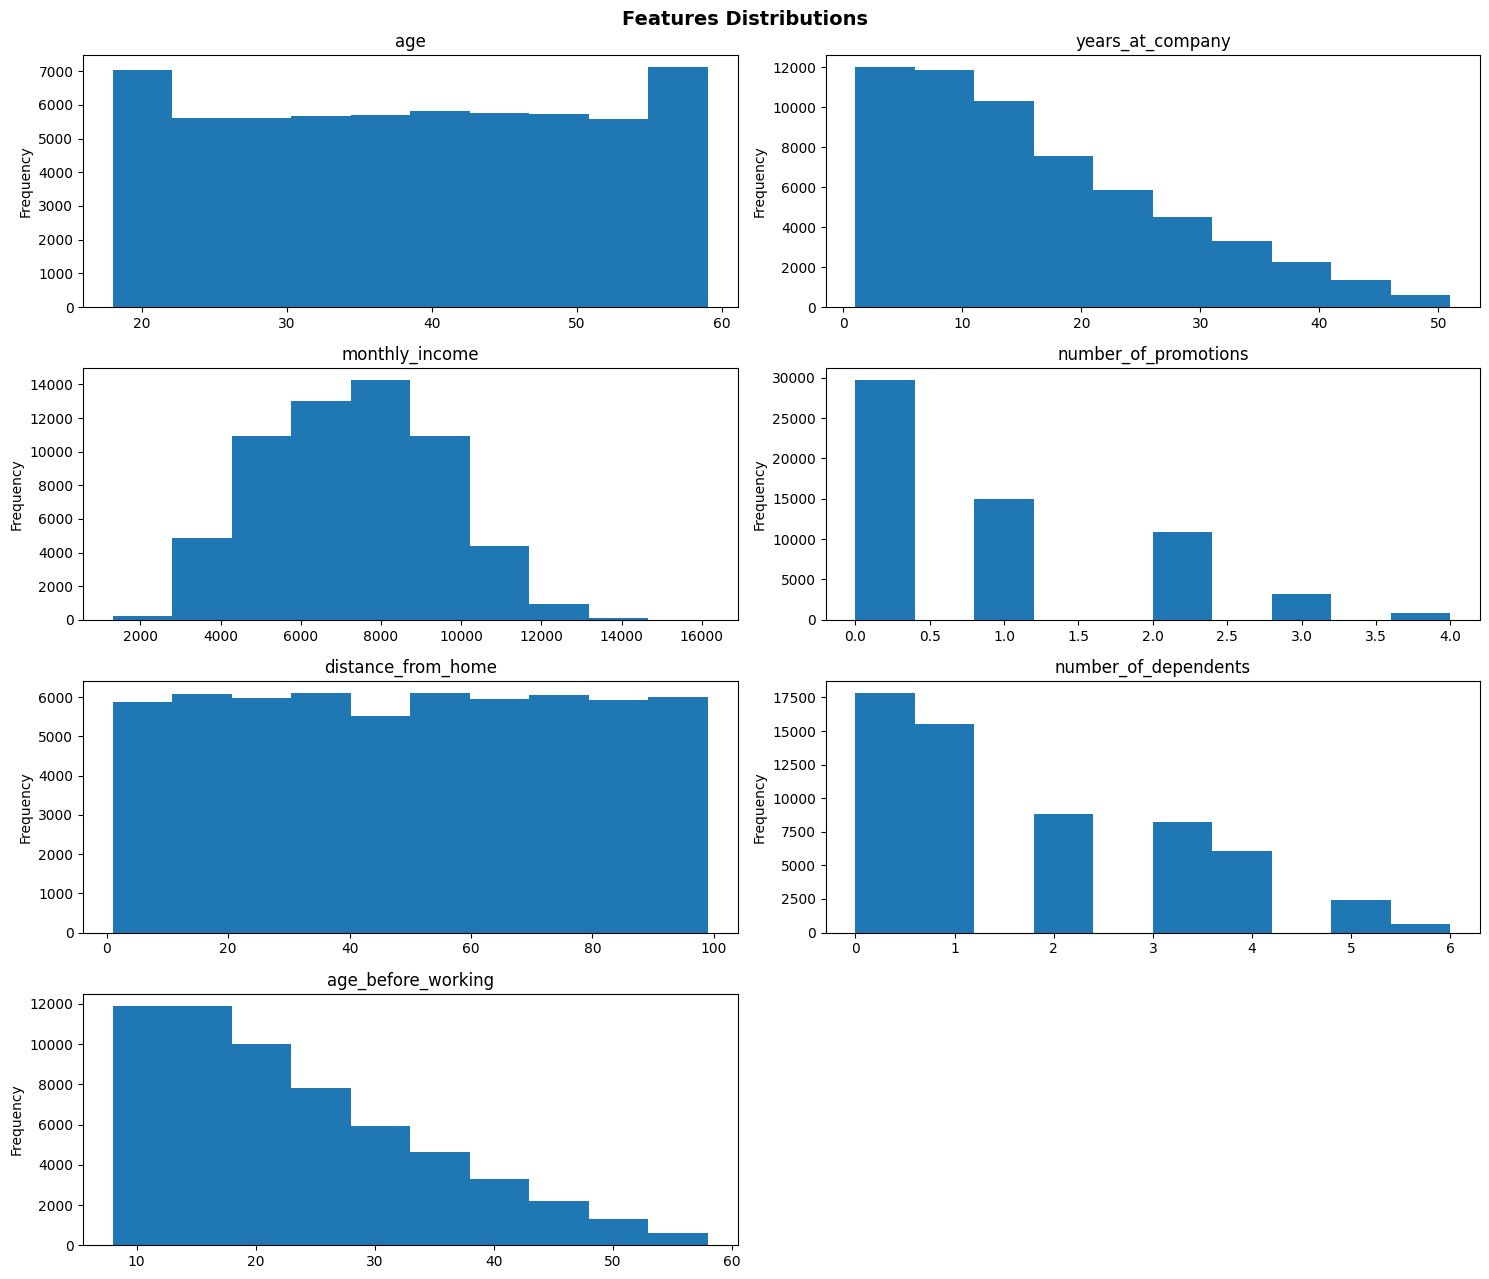

In [134]:
df_plotting =df.select_dtypes(include='number').drop(columns= ["employee_id"])
fig = plt.figure(figsize=(15, 13))
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(4, 2, i)
    df[column].plot(kind='hist')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

In [157]:
len(df.select_dtypes(include='object').columns)
df.select_dtypes(include='object').columns

Index(['gender', 'job_role', 'work-life_balance', 'job_satisfaction',
       'performance_rating', 'overtime', 'education_level', 'marital_status',
       'job_level', 'company_size', 'remote_work', 'leadership_opportunities',
       'innovation_opportunities', 'company_reputation',
       'employee_recognition', 'attrition', 'age_groups'],
      dtype='object')

C:\Users\Lenovo - LOQ\AppData\Local\Temp\ipykernel_5448\1186003291.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



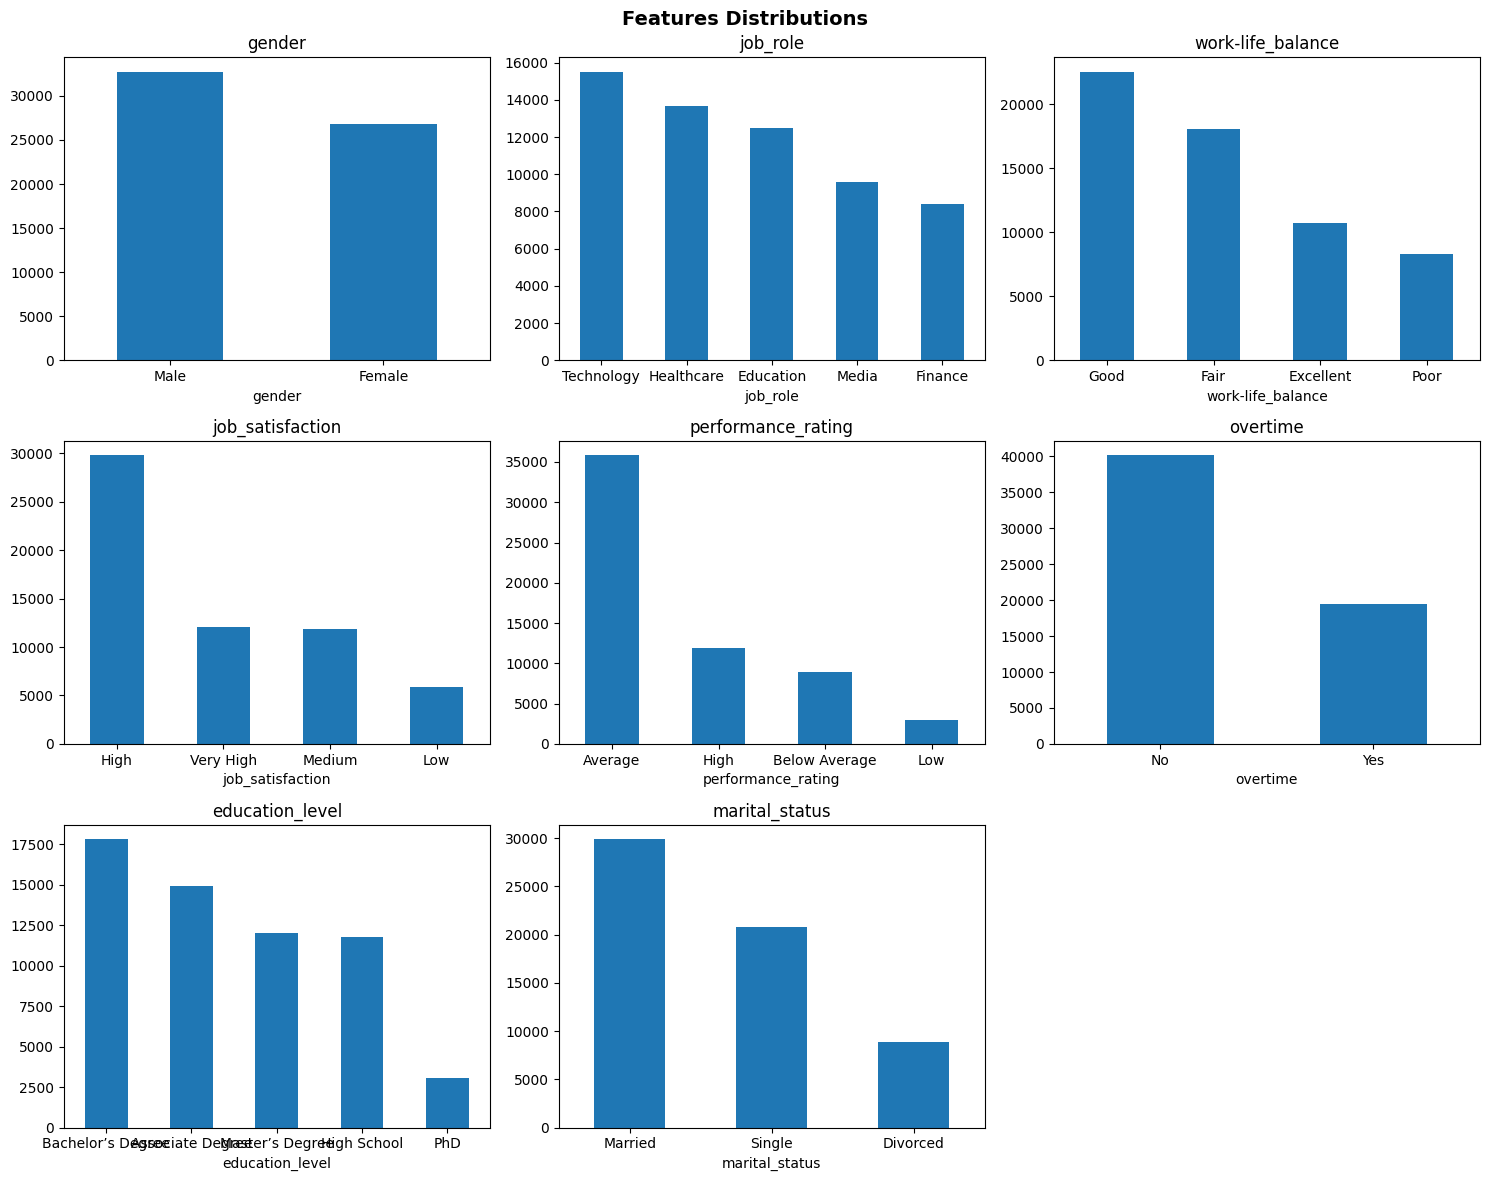

In [156]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[0:8], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

C:\Users\Lenovo - LOQ\AppData\Local\Temp\ipykernel_5448\2582619470.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



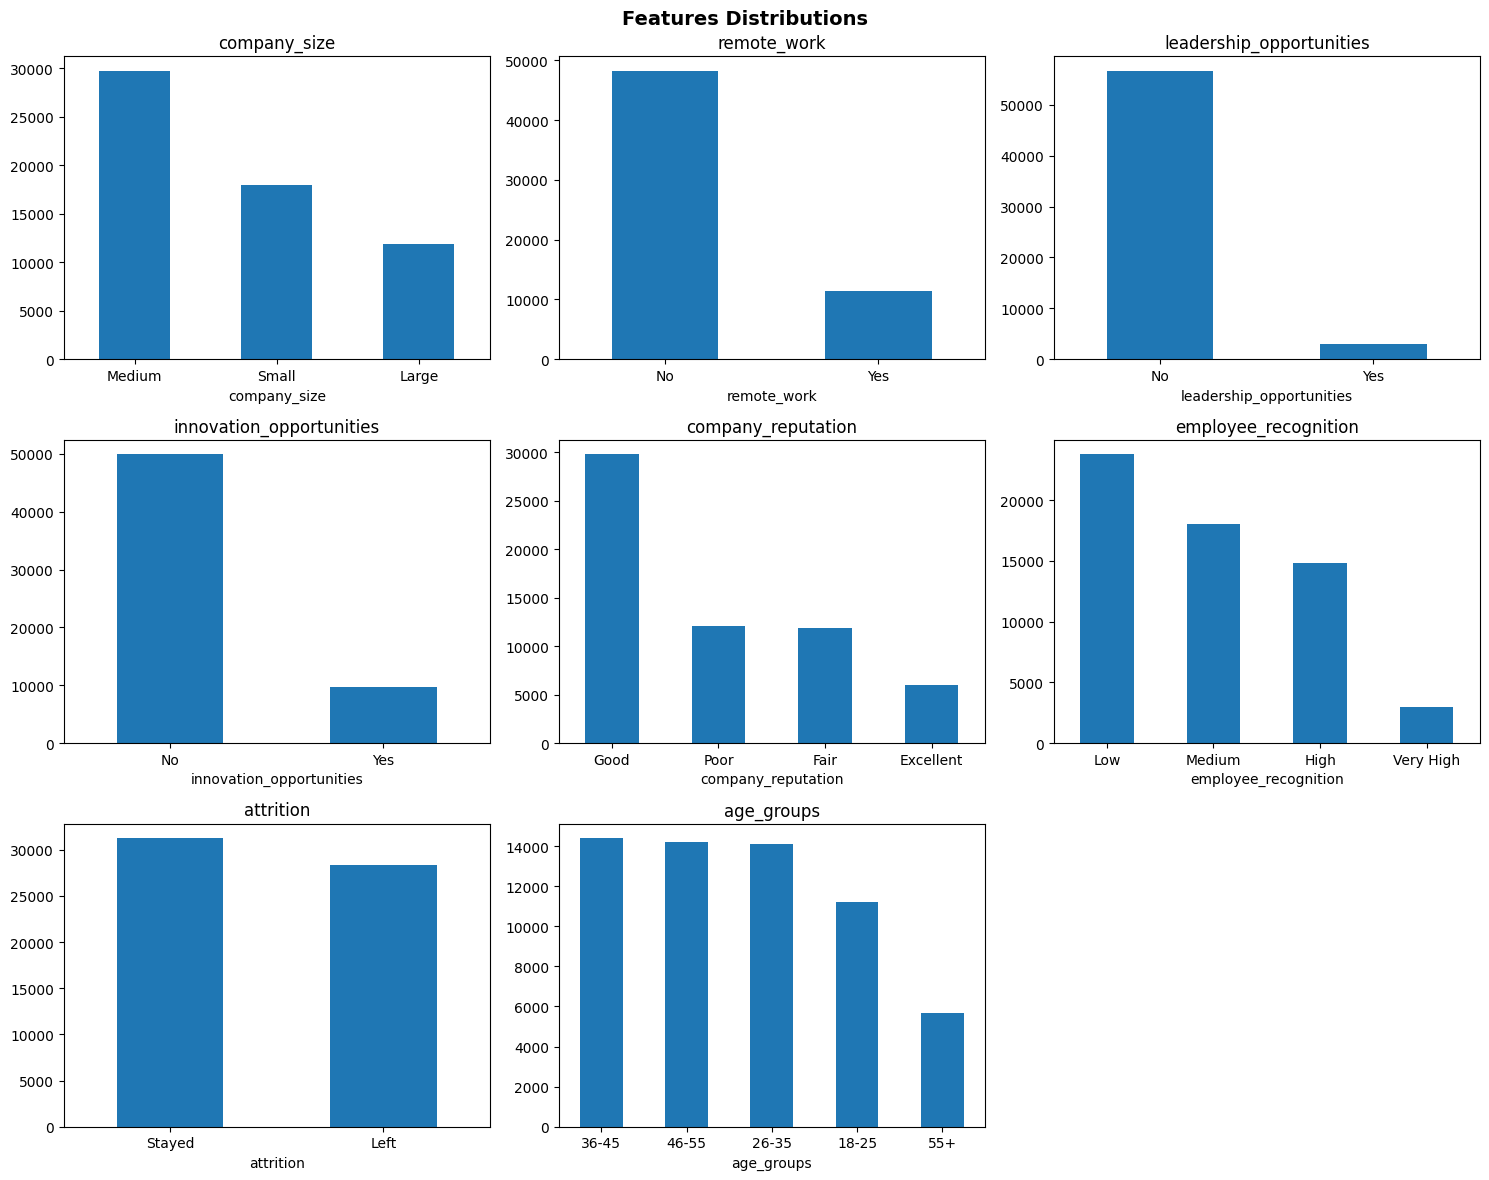

In [155]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[9:], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

#### Age

In [73]:
fig = px.histogram(df["age"])
fig.show()

#### Years at Compnay

In [83]:
fig = px.histogram(df["years_at_company"], labels= {"years_at_company": "Years at company"})
fig.show()

#### Monthly Income

In [111]:
fig = px.histogram(df["monthly_income"])
fig.show()

#### Overtime

In [109]:
jobRole_overtime = df.groupby(["overtime", "job_role"])["employee_id"].count().reset_index()
jobRole_overtime = jobRole_overtime.rename(columns={"employee_id": "count"})
fig = px.sunburst(
    jobRole_overtime,
    path=["overtime", "job_role"],  # hierarchy levels
    values="count",                 # size of each slice
    title="Job Role Distribution by Overtime"
)

fig.show()

In [70]:
fig = px.pie(df, names="age_groups", title="Age Before Working")
fig.show()